In [117]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

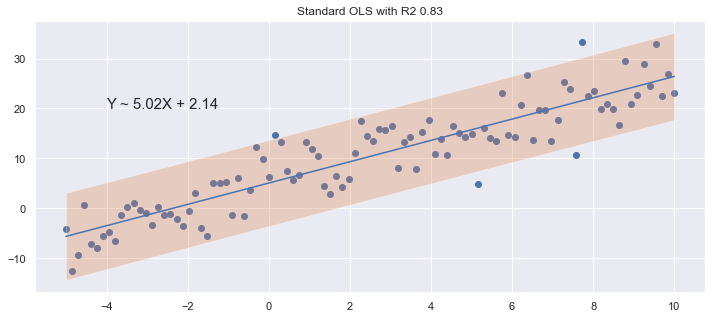

In [144]:
X = np.linspace(-5, 10, 100)
Y = 2 * X + 5 + stats.norm.rvs(scale=4, size=100)
X_with_b = sm.add_constant(X)
model = sm.OLS(Y, X_with_b)
res = model.fit()
prdst, iv_l, iv_u = wls_prediction_std(res)
ols_text = f'Y ~ {res.params[0].round(2)}X + {res.params[1].round(2)}'

plt.figure(figsize=(12, 5))
plt.scatter(X, Y)
plt.plot(X, res.predict())
plt.fill_between(X, iv_l, iv_u, alpha=0.3)
plt.text(-4, 20, ols_text, fontsize=15)
plt.title(f'Standard OLS with R2 {res.rsquared.round(2)}');

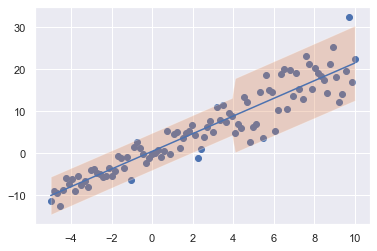

In [175]:
w = np.full([100], 2)
w[60:] = 4
first_inv = 2 * X[:60]
sec_inv = 2 * X[60:]
Y = np.hstack([first_inv, sec_inv])
Y += stats.norm.rvs(size=100) * w

plt.scatter(X, Y)
weight_model = sm.WLS(Y, sm.add_constant(X), weights = 1/ (w ** 2))
res = weight_model.fit()
prdst, iv_l, iv_u = wls_prediction_std(res)
plt.fill_between(X, iv_l, iv_u, alpha=0.3)
plt.plot(X, res.predict())

In [159]:
w[60:] = 5